In [520]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
#from gmdhpy import gmdh
%matplotlib inline 
sns.set(style="ticks")

In [521]:
#Загружаем данные и выводим первые строки
data=pd.read_csv("cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [522]:
data=data[['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
# типы колонок
data.dtypes

diagnosis                  object
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

In [523]:
# размер набора данных
data.shape

(569, 11)

In [524]:
# проверим есть ли пропущенные значения
data.isnull().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [525]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [526]:
from sklearn.preprocessing import LabelEncoder

In [527]:
enc = pd.DataFrame(data['diagnosis'])
enc['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [528]:
le = LabelEncoder()
enc_le = le.fit_transform(enc['diagnosis'])
np.unique(enc_le)

array([0, 1])

In [529]:
gen_enc = pd.DataFrame({'diagnosis':enc_le})
for index, row in gen_enc.iterrows():
    data.loc[index, 'diagnosis'] = row['diagnosis']
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [530]:
data['diagnosis']=data['diagnosis'].astype(str).astype(np.int64)
data.dtypes

diagnosis                   int64
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

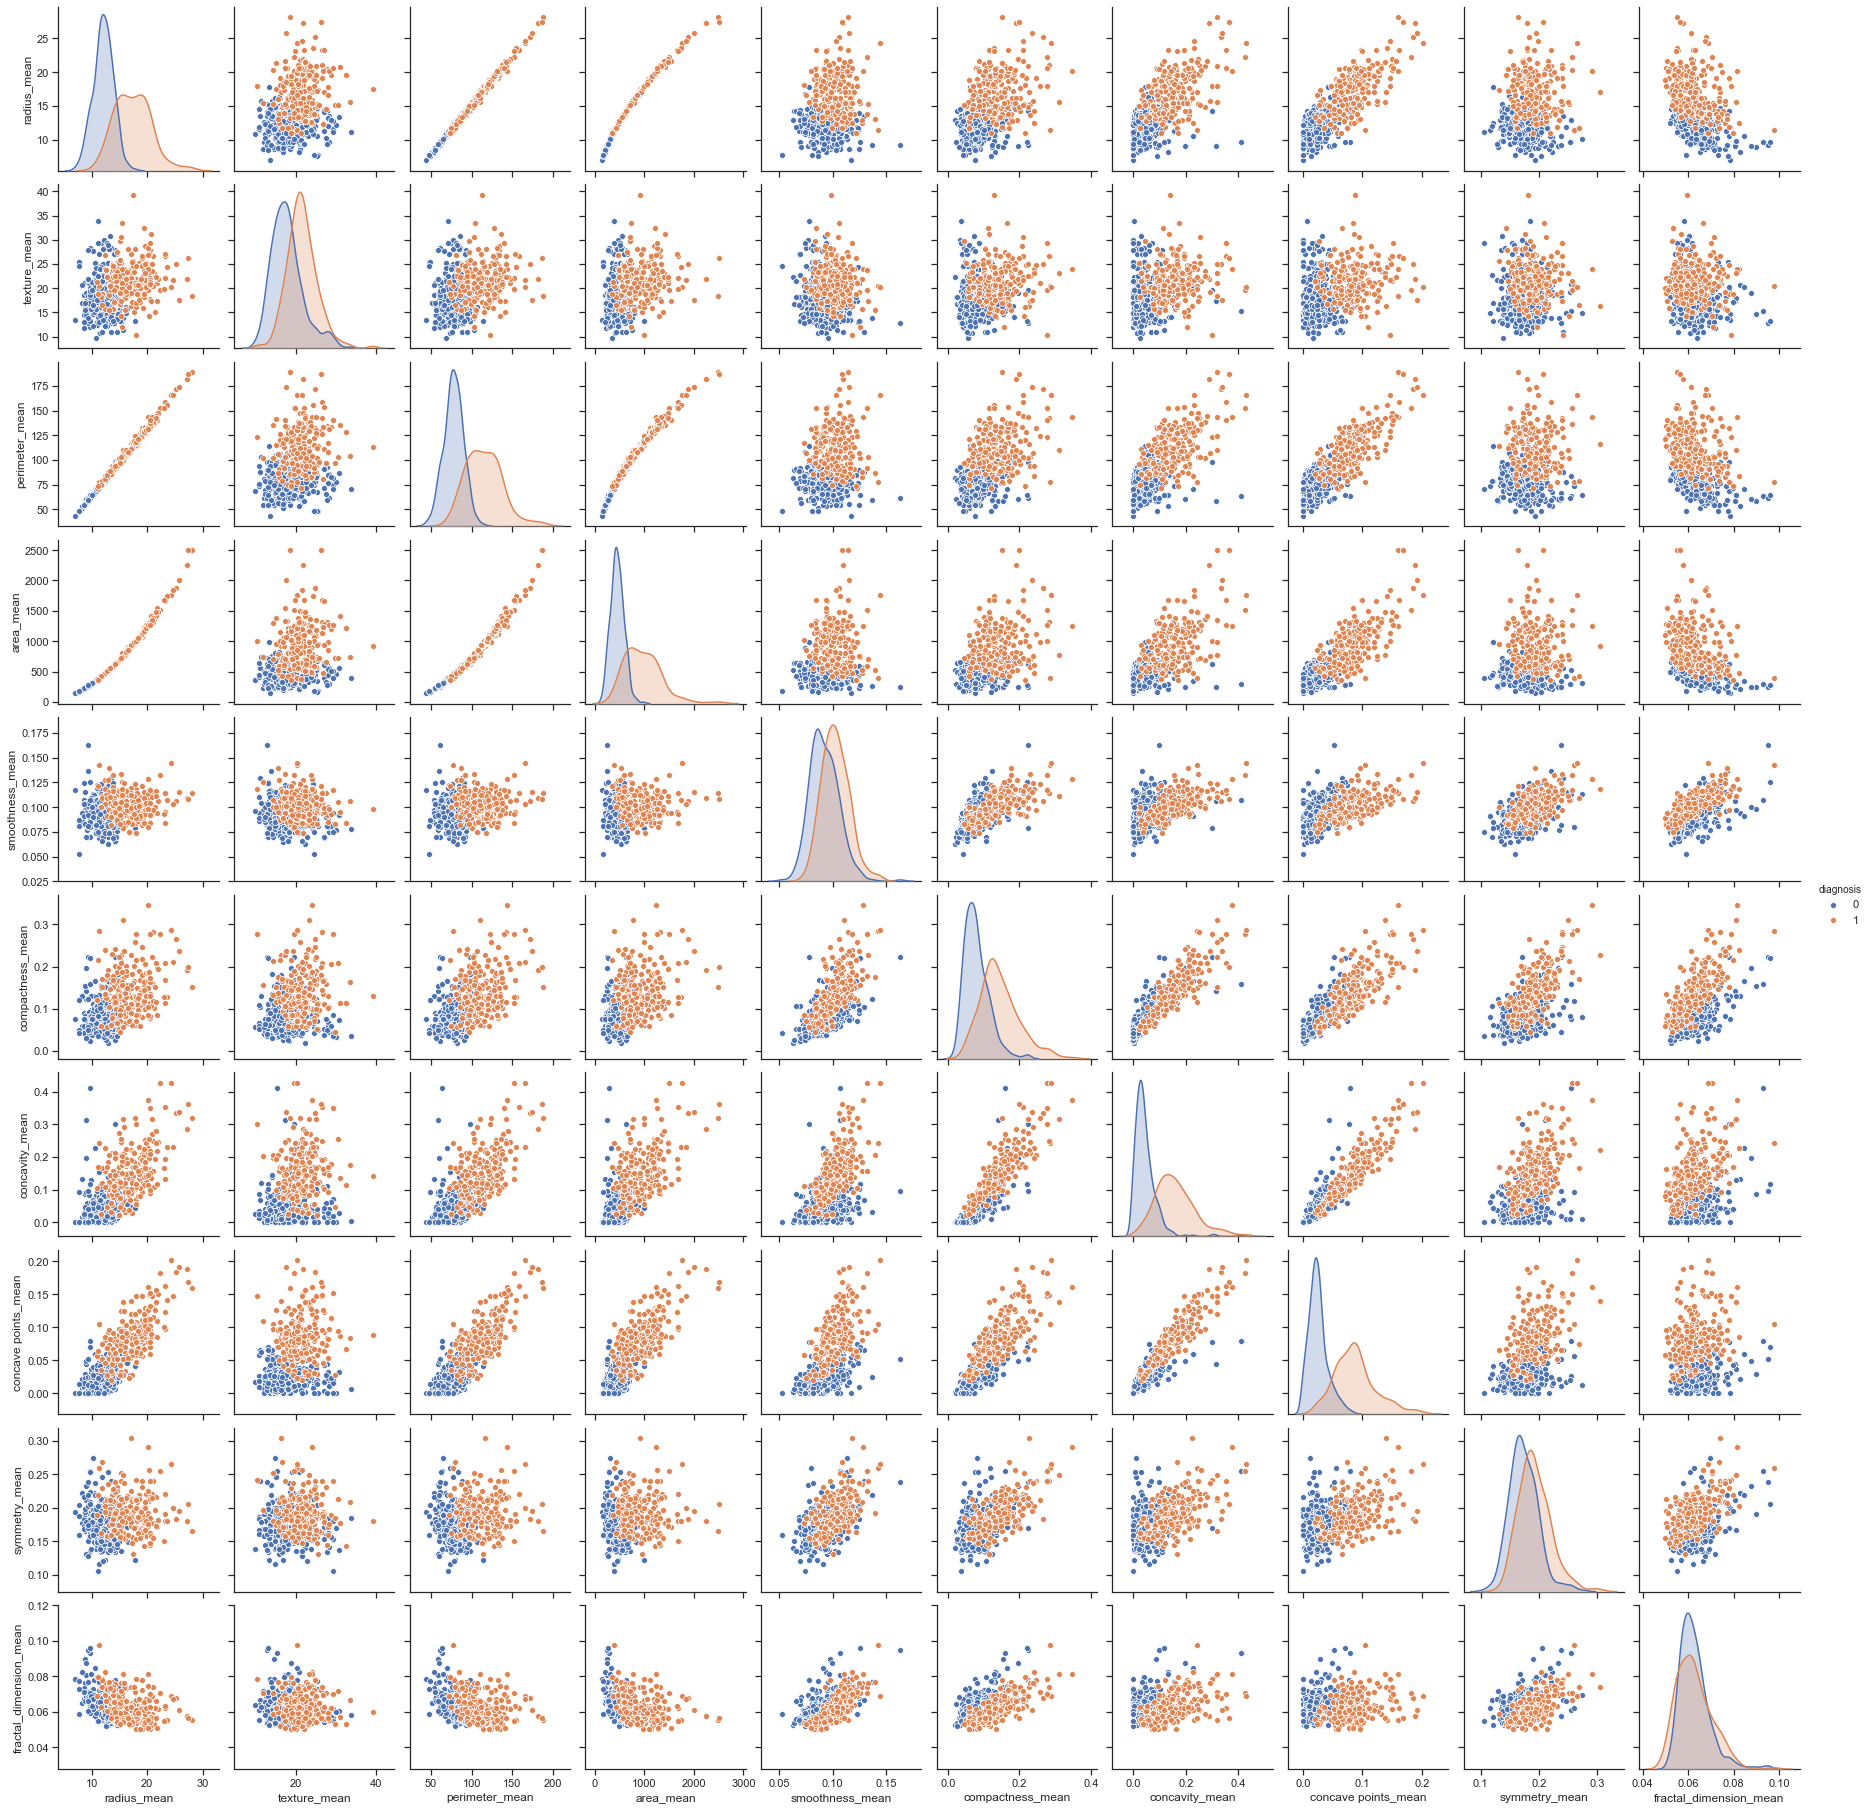

In [531]:
# Парные диаграммы
sns.pairplot(data, hue='diagnosis')

In [532]:
# Убедимся, что целевой признак
# для задачи бинарной классификации содержит только 0 и 1
data['diagnosis'].unique()

array([1, 0], dtype=int64)

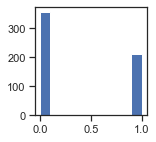

In [533]:
# Оценим дисбаланс классов для целевого признака
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(data['diagnosis'])
plt.show()

In [534]:
# посчитаем дисбаланс классов
total = data.shape[0]
class_0, class_1 = data['diagnosis'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 62.739999999999995%, а класс 1 составляет 37.26%.


In [535]:
# Выбор признаков, подходящих для построения моделей.
# Кодирование категориальных признаков. Масштабирование данных. 
# Формирование вспомогательных признаков, улучшающих качество моделей.

In [536]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [537]:
# Числовые колонки для масштабирования
scale_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean','compactness_mean',
              'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

In [538]:
from sklearn.preprocessing import MinMaxScaler
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [539]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [540]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_mean_scaled,texture_mean_scaled,perimeter_mean_scaled,area_mean_scaled,smoothness_mean_scaled,compactness_mean_scaled,concavity_mean_scaled,concave points_mean_scaled,symmetry_mean_scaled,fractal_dimension_mean_scaled
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816


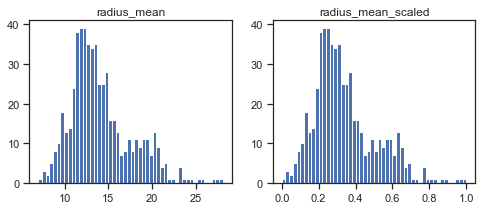

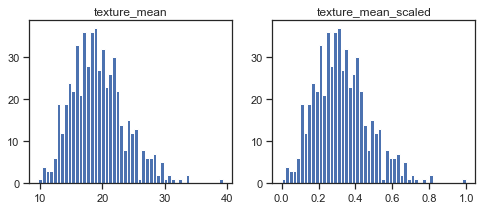

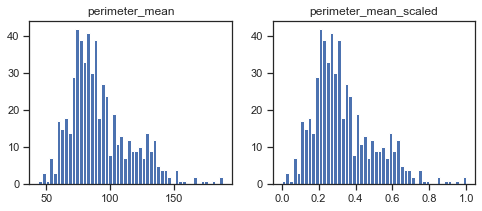

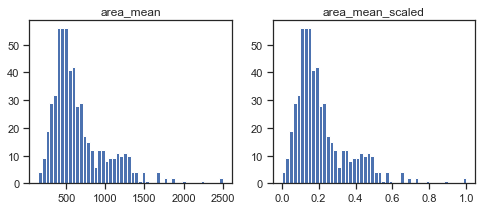

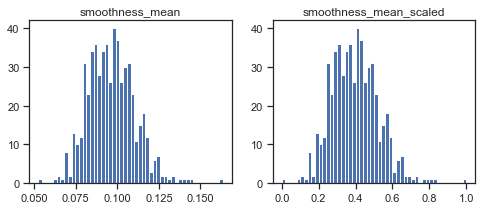

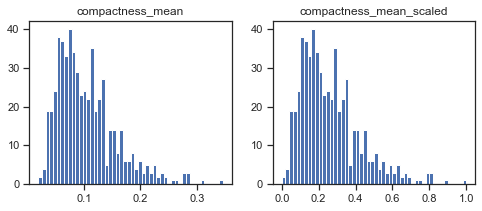

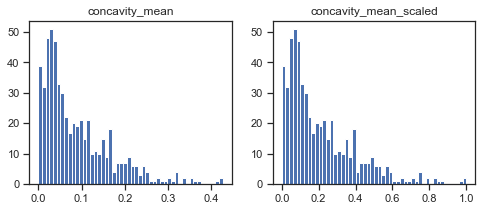

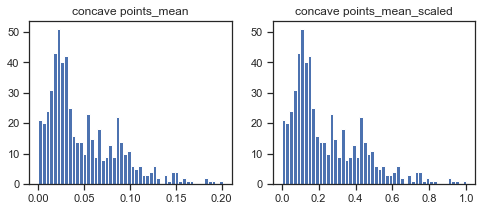

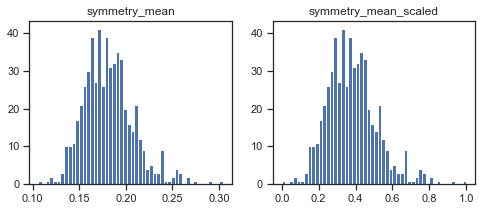

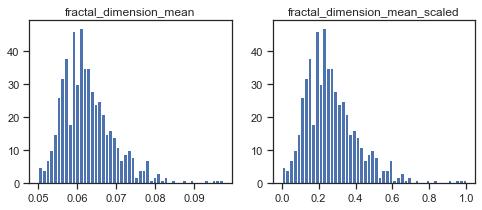

In [541]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

In [542]:
#Проведение корреляционного анализа данных. 
#Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [543]:
corr_cols_1 = scale_cols + ['diagnosis']
corr_cols_1

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'diagnosis']

In [544]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['diagnosis']
corr_cols_2

['radius_mean_scaled',
 'texture_mean_scaled',
 'perimeter_mean_scaled',
 'area_mean_scaled',
 'smoothness_mean_scaled',
 'compactness_mean_scaled',
 'concavity_mean_scaled',
 'concave points_mean_scaled',
 'symmetry_mean_scaled',
 'fractal_dimension_mean_scaled',
 'diagnosis']

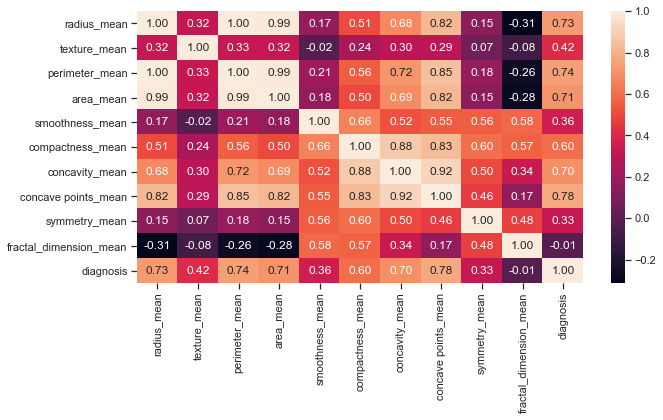

In [545]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')

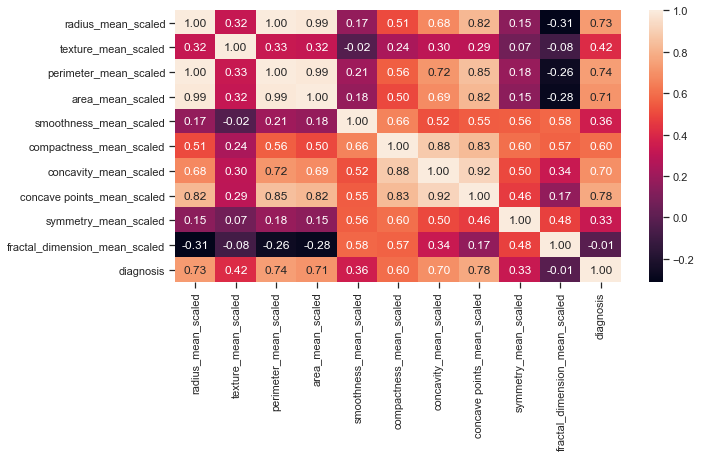

In [546]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')

In [547]:
data = data[corr_cols_2].drop(['area_mean_scaled', 'radius_mean_scaled', 'fractal_dimension_mean_scaled',
                               'smoothness_mean_scaled', 'symmetry_mean_scaled'], axis=1)
data

,texture_mean_scaled,perimeter_mean_scaled,compactness_mean_scaled,concavity_mean_scaled,concave points_mean_scaled,diagnosis
0,0.022658,0.545989,0.792037,0.703140,0.731113,1
1,0.272574,0.615783,0.181768,0.203608,0.348757,1
2,0.390260,0.595743,0.431017,0.462512,0.635686,1
3,0.360839,0.233501,0.811361,0.565604,0.522863,1
4,0.156578,0.630986,0.347893,0.463918,0.518390,1
...,...,...,...,...,...,...
564,0.428813,0.678668,0.296055,0.571462,0.690358,1
565,0.626987,0.604036,0.257714,0.337395,0.486630,1
566,0.621238,0.445788,0.254340,0.216753,0.263519,1
567,0.663510,0.665538,0.790197,0.823336,0.755467,1


In [548]:
#Сохранение и визуализация метрик

In [549]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()

In [550]:
#Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [551]:
target = data['diagnosis']
data = data.drop('diagnosis', axis = 1)

In [552]:
data.columns

Index(['texture_mean_scaled', 'perimeter_mean_scaled',
       'compactness_mean_scaled', 'concavity_mean_scaled',
       'concave points_mean_scaled'],
      dtype='object')

In [553]:
data.head()

,texture_mean_scaled,perimeter_mean_scaled,compactness_mean_scaled,concavity_mean_scaled,concave points_mean_scaled
0,0.022658,0.545989,0.792037,0.703140,0.731113
1,0.272574,0.615783,0.181768,0.203608,0.348757
2,0.390260,0.595743,0.431017,0.462512,0.635686
3,0.360839,0.233501,0.811361,0.565604,0.522863
4,0.156578,0.630986,0.347893,0.463918,0.518390


In [554]:
#деление на тестовую и обучающую выборку
clas_X_train, clas_X_test, clas_Y_train, clas_Y_test = train_test_split(
    data, target, test_size=0.05, random_state=1)
clas_X_train.shape, clas_X_test.shape, clas_Y_train.shape, clas_Y_test.shape

((540, 5), (29, 5), (540,), (29,))

In [555]:
#Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. 
#Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [556]:
# Модели
clas_models = {'LogR': LogisticRegression(), 
               'SVC':SVC(),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [557]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

In [558]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(clas_X_train, clas_Y_train)
    Y_pred = model.predict(clas_X_test)
    conf_matrix = confusion_matrix(clas_Y_test.values, Y_pred)
    precision = precision_score(clas_Y_test.values, Y_pred)
    recall = recall_score(clas_Y_test.values, Y_pred)
    f1 = f1_score(clas_Y_test.values, Y_pred)
    roc_auc = roc_auc_score(clas_Y_test.values, Y_pred)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    print('*****************************************************')
    print(model)
    print('*****************************************************')
    draw_roc_curve(clas_Y_test.values, Y_pred)
    
    plot_confusion_matrix(model, clas_X_test, clas_Y_test.values, 
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    plt.show()

In [559]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

*****************************************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
*****************************************************


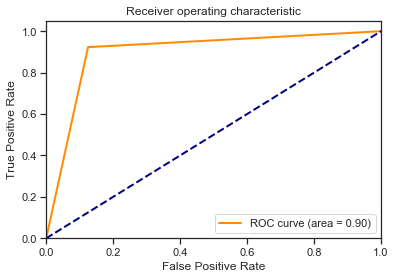

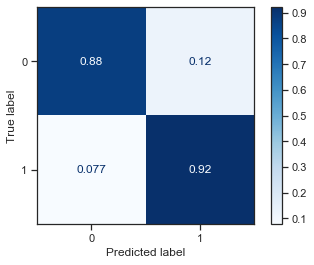

*****************************************************
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
*****************************************************


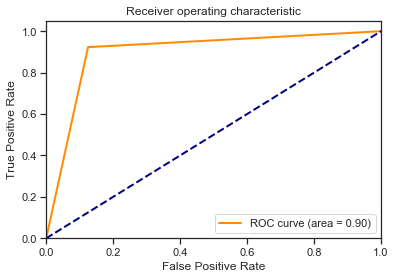

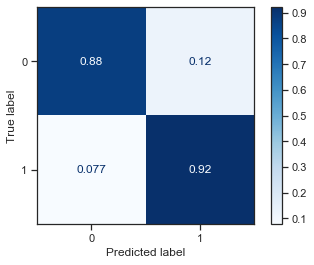

*****************************************************
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
*****************************************************


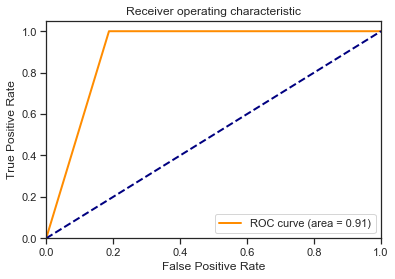

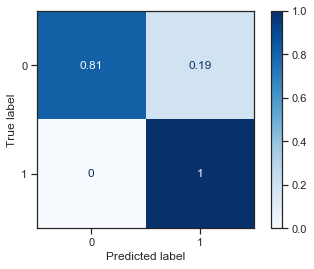

*****************************************************
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
*****************************************************


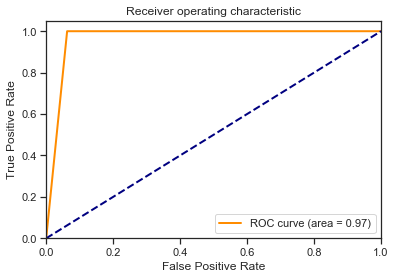

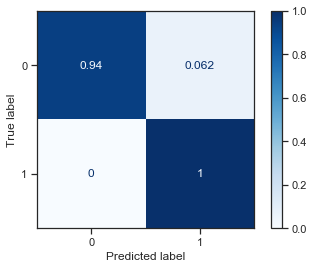

*****************************************************
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
*****************************************************


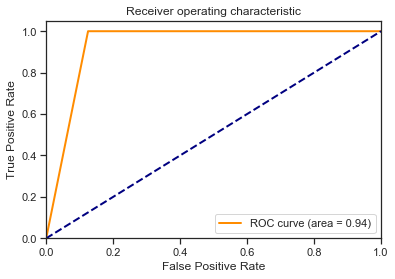

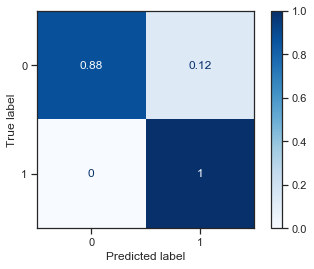

In [560]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

In [561]:
#Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. 
#В зависимости от используемой библиотеки можно применять функцию GridSearchCV, 
#использовать перебор параметров в цикле, или использовать другие методы.

In [562]:
parameters = {'penalty':['l1', 'l2', 'elasticnet'],
             'C':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]}
clf_gs_log = GridSearchCV(LogisticRegression(), parameters, cv=5, scoring='roc_auc')
clf_gs_log.fit(clas_X_train, clas_Y_train)

C:\Users\Dasik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Dasik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\Dasik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Dasik\anaconda3\lib\site-p

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [563]:
# Лучшая модель
clf_gs_log.best_estimator_

LogisticRegression(C=1.4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [564]:
# Лучшее значение параметров
clf_gs_log.best_params_

{'C': 1.4, 'penalty': 'l2'}

In [565]:
parameters = {'gamma':[200,160,150,130,120,110,100,50, 25, 10, 1],
             'kernel': ['linear', 'rbf']}
clf_gs_svm_svc = GridSearchCV(SVC(), parameters, cv=5, scoring='roc_auc')
clf_gs_svm_svc.fit(clas_X_train, clas_Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [200, 160, 150, 130, 120, 110, 100, 50, 25,
                                   10, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [566]:
# Лучшая модель
clf_gs_svm_svc.best_estimator_

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [567]:
# Лучшее значение параметров
clf_gs_svm_svc.best_params_

{'gamma': 1, 'kernel': 'rbf'}

In [568]:
parameters = {'max_depth':[20,15,10,6,5,4,3], 'min_samples_split':[10,8,6,5,4,3,2]}
clf_gs_decision_tree = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, scoring='roc_auc')
clf_gs_decision_tree.fit(clas_X_train, clas_Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [20, 15, 10, 6, 5, 4, 3],
              

In [569]:
clf_gs_decision_tree.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [570]:
# Лучшее значение параметров
clf_gs_decision_tree.best_params_

{'max_depth': 4, 'min_samples_split': 5}

In [571]:
parameters_random_forest = {'n_estimators':[1, 3, 5, 6, 7, 8, 10, 20], 
                            'max_depth':[1, 3, 5, 6, 7, 8, 10],
                            'random_state':[0, 2, 4, 6, 8, 10, 15]}
best_random_forest = GridSearchCV(RandomForestClassifier(), parameters_random_forest, cv=5, scoring='roc_auc')
best_random_forest.fit(clas_X_train, clas_Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [572]:
# Лучшая модель
best_random_forest.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=15, verbose=0,
                       warm_start=False)

In [573]:
best_random_forest.best_params_

{'max_depth': 5, 'n_estimators': 20, 'random_state': 15}

In [574]:
parameters_gradient_boosting = {'n_estimators':[2, 3, 5, 7, 10, 15, 17, 20, 23, 25, 27], 
                            'max_depth':[1, 2 ,3, 5, 7, 9, 10, 15]}
best_gradient_boosting = GridSearchCV(GradientBoostingClassifier(), parameters_gradient_boosting, cv=5, scoring='roc_auc')
best_gradient_boosting.fit(clas_X_train, clas_Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [575]:
# Лучшая модель
best_gradient_boosting.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=25,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [576]:
best_gradient_boosting.best_params_

{'max_depth': 2, 'n_estimators': 25}

In [577]:
#Повторение пункта 8 для найденных оптимальных значений гиперпараметров. 
#Сравнение качества полученных моделей с качеством baseline-моделей.

In [578]:
# Новые модели с подобранными гиперпараматерами
clas_models_grid = {'LogR':clf_gs_log.best_estimator_, 
               'SVC':clf_gs_svm_svc.best_estimator_,
               'Tree':clf_gs_decision_tree.best_estimator_,
               'RF':best_random_forest.best_estimator_,
               'GB':best_gradient_boosting.best_estimator_}

*****************************************************
LogisticRegression(C=1.4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
*****************************************************


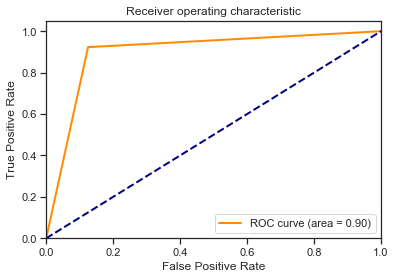

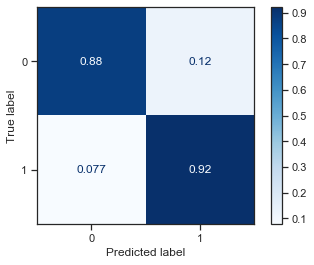

*****************************************************
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
*****************************************************


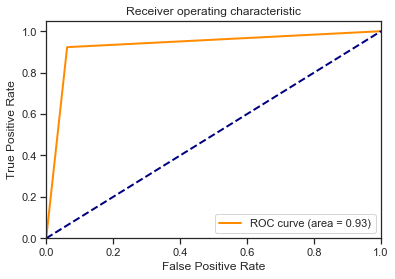

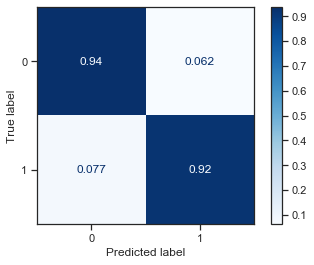

*****************************************************
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
*****************************************************


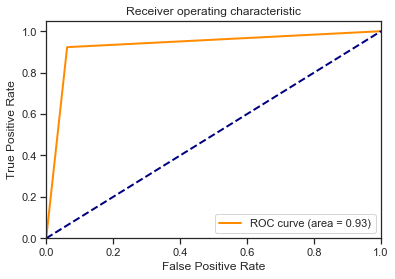

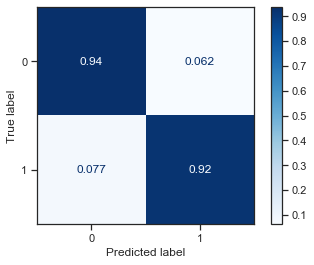

*****************************************************
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=15, verbose=0,
                       warm_start=False)
*****************************************************


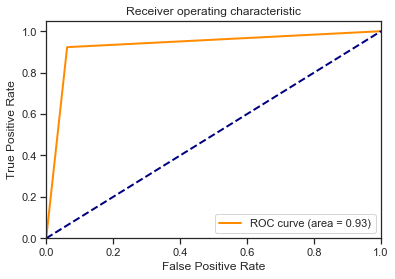

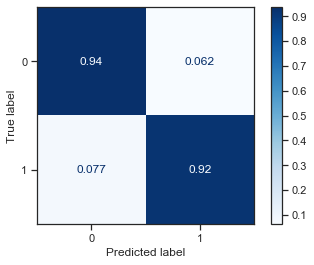

*****************************************************
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=25,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
*****************************************************


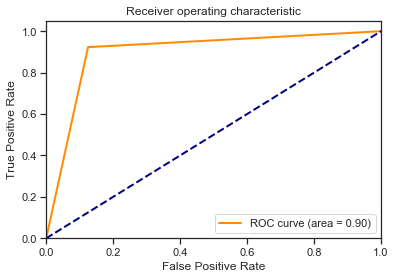

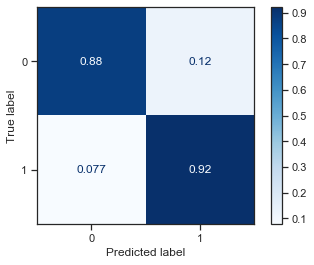

In [579]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

In [580]:
#Формирование выводов о качестве построенных моделей на основе выбранных метрик.

In [581]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

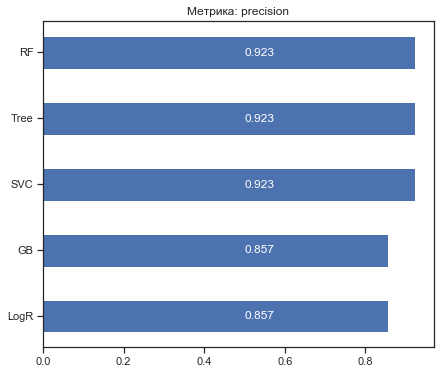

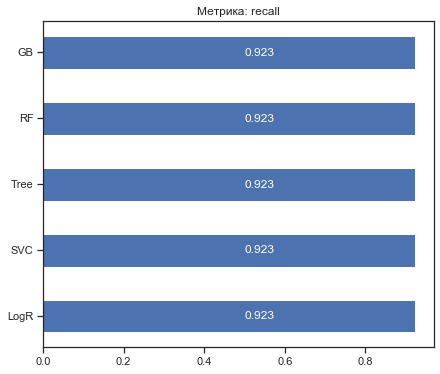

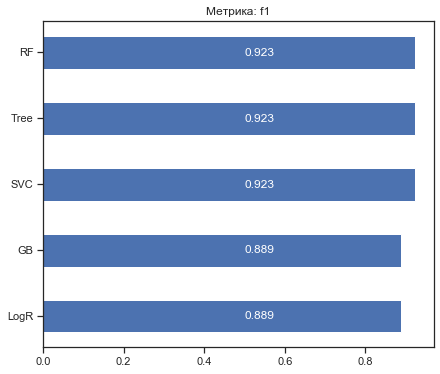

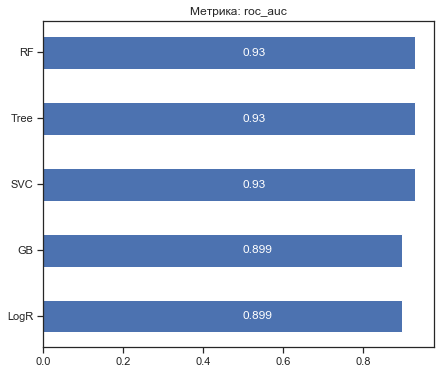

In [582]:

# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))